In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [20]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Stock Prediction/005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015.5.22,27060,27060,26700,27000,261.837372,8195800
1,2015.5.26,27320,27380,26720,27240,264.164825,10034150
2,2015.5.27,27200,27320,26260,26280,254.855087,17265450
3,2015.5.28,26340,26420,26020,26180,253.885300,15048150
4,2015.5.29,26400,26420,25940,26140,253.497406,17380750


In [0]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [0]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [25]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1012, 50, 1), (112, 50, 1))

In [26]:

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 1012 samples, validate on 112 samples
Epoch 1/20
1012/1012 [==============================] - 5s 5ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 2/20
1012/1012 [==============================] - 4s 4ms/step - loss: 7.6475e-04 - val_loss: 0.0014
Epoch 3/20
1012/1012 [==============================] - 4s 4ms/step - loss: 5.3691e-04 - val_loss: 6.3477e-04
Epoch 4/20
1012/1012 [==============================] - 4s 4ms/step - loss: 3.9641e-04 - val_loss: 6.3783e-04
Epoch 5/20
1012/1012 [==============================] - 4s 4ms/step - loss: 3.2051e-04 - val_loss: 3.3987e-04
Epoch 6/20
1012/1012 [==============================] - 4s 4ms/step - loss: 2.7414e-04 - val_loss: 2.6054e-04
Epoch 7/20
1012/1012 [==============================] - 4s 4ms/step - loss: 2.5833e-04 - val_loss: 3.1705e-04
Epoch 8/20
1012/1012 [==============================] - 4s 4ms/step - loss: 2.5394e-04 - val_loss: 3.6468e-04
Epoch 9/20
1012/1012 [==============================] - 4s 4ms/step - loss: 2.3955e-0

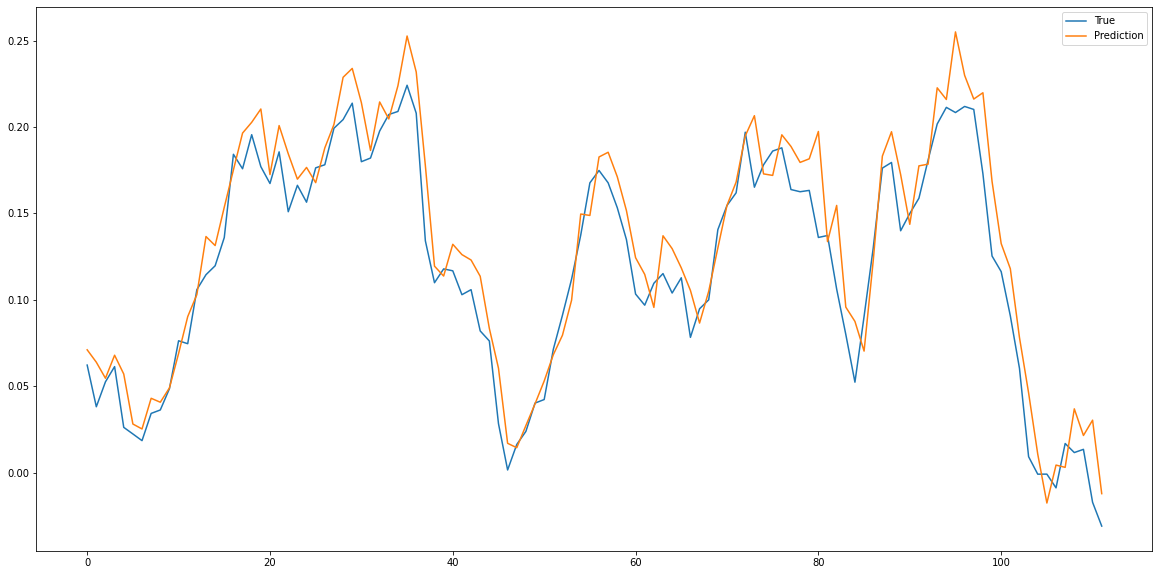

In [28]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()